In [ ]:
#objective: Estimate chance of Bankruptcy from Qualitative parameters from experts

In [5]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#load data
df = pd.read_csv('../datasets/Qualitative_Bankruptcy.data.txt', sep=",", header=None)
#df.columns = ["Wifi 1", "Wifi 2", "Wifi 3", "Wifi 4","Wifi 5", "Wifi 6", "Wifi 7", "Room"]
df.columns = ['industrial_risk', 'management_risk', 'financial_flexibility',
              'credibility', 'competitiveness', 'operating_risk', 'class']

In [3]:
#check data
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
#get descriptive statistics
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [7]:
#one hot encode data
df_industrial = pd.get_dummies(df.industrial_risk)
df_management = pd.get_dummies(df.management_risk)
df_financial = pd.get_dummies(df.financial_flexibility)
df_crdibility = pd.get_dummies(df.credibility)
df_compete = pd.get_dummies(df.competitiveness)
df_operating = pd.get_dummies(df.operating_risk)


In [11]:
df_industrial.head()

,A,N,P
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0


In [8]:
#recode class
cleanup_nums = {"class":{"NB":0, "B":1}}
df.replace(cleanup_nums, inplace=True)
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,P,P,A,A,A,P,0
1,N,N,A,A,A,N,0
2,A,A,A,A,A,A,0
3,P,P,P,P,P,P,0
4,N,N,P,P,P,N,0


In [9]:
#combine data
df_new = pd.concat([df_industrial,df_management,df_financial,df_crdibility,df_compete,
                    df_operating, df['class']],axis=1) 

In [14]:
df_new.head()

,A,N,P,A,N,P,A,N,P,A,N,P,A,N,P,A,N,P,class
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0


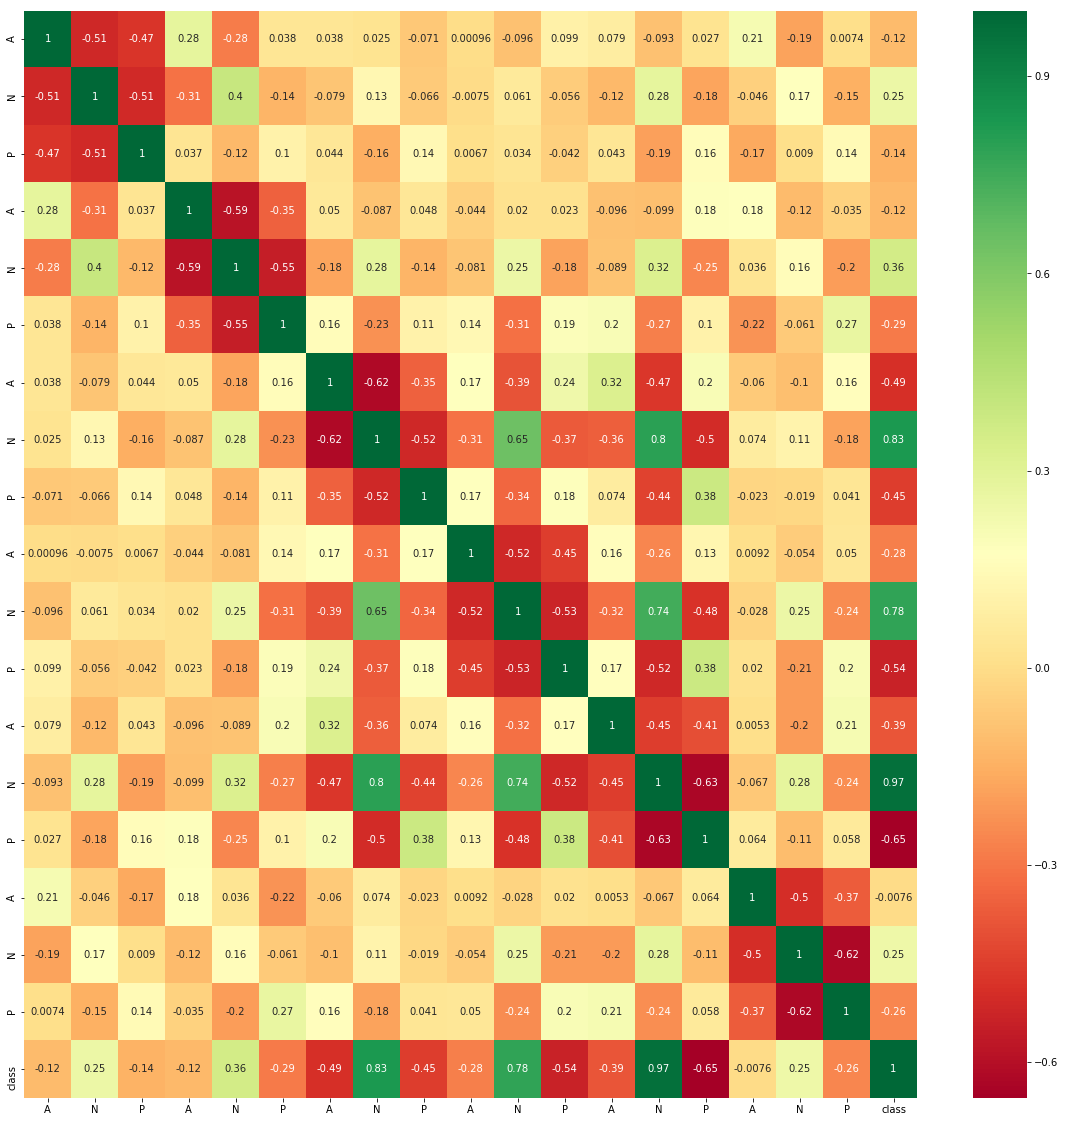

In [10]:
#correlation
x = df_new.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [11]:
#split data
X = df_new.drop('class', axis=1)
y = df_new['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

KNN: 0.992000 (0.016000)
CART: 0.996000 (0.012000)
SVM: 0.984000 (0.026533)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

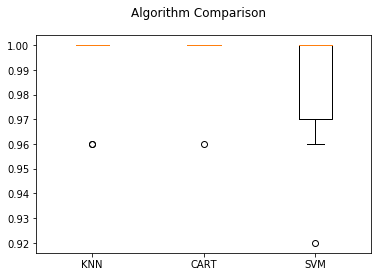

In [12]:
#build model
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#perform classification
array = df_new.values
X = array[:,0:18]
Y = array[:,18]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [13]:
#try random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

1.0

In [14]:
#try on test data
model = random_forest.fit(X_train, y_train)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [15]:
#confusion matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["NB", "B"],
    index=["NB", "B"]
)

,NB,B
NB,36,0
B,0,27
